In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [54]:
historical_legal = pd.read_csv("/content/data/WBL2024-1-0-Historical-Panel-Data - WBL Panel 2024.csv")
female_to_male_pay = pd.read_csv("/content/data/EAR_GGAP_OCU_RT_A-full-2025-12-03.csv")
gdp = pd.read_csv("/content/data/WB_WDI_NY_GDP_MKTP_KD_ZG.csv")

In [55]:
ssa_historical_legal = historical_legal[historical_legal["Region"] == "Sub-Saharan Africa"]

In [56]:
ssa_historical_legal_2024 = ssa_historical_legal[ssa_historical_legal["Report Year"] == 2024]

In [57]:
question_columns = [col for col in ssa_historical_legal_2024.columns if col.endswith("?")]

In [58]:
ssa_historical_legal_2024 = ssa_historical_legal_2024[["Economy"] + question_columns]
ssa_historical_legal_2024[question_columns] = ssa_historical_legal_2024[question_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

/tmp/ipython-input-561724213.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ssa_historical_legal_2024[question_columns] = ssa_historical_legal_2024[question_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [59]:
column_nicknames = {
 'Can a woman choose where to live in the same way as a man?': 'residence_equality',
 'Can a woman travel outside her home in the same way as a man?': 'domestic_travel_eq',
 'Can a woman apply for a passport in the same way as a man?': 'passport_equality',
 'Can a woman travel outside the country in the same way as a man?': 'intl_travel_equality',

 'Can a woman get a job in the same way as a man?': 'job_access_equality',
 'Does the law prohibit discrimination in employment based on gender?': 'employment_nondiscrimination',

 'Is there legislation on sexual harassment in employment?': 'harassment_employment_law',
 'Are there criminal penalties or civil remedies for sexual harassment in employment?': 'harassment_penalties',

 'Does the law mandate equal remuneration for work of equal value?': 'equal_pay_law',

 'Can a woman work at night in the same way as a man?': 'night_work_equality',
 'Can a woman work in a job deemed dangerous in the same way as a man?': 'danger_work_equality',
 'Can a woman work in an industrial job in the same way as a man?': 'industrial_work_equality',

 'Is the law free of legal provisions that require a married woman to obey her husband?': 'no_obedience_law',

 'Can a woman be head of household in the same way as a man?': 'household_head_eq',

 'Is there legislation specifically addressing domestic violence?': 'domestic_violence_law',

 'Can a woman obtain a judgment of divorce in the same way as a man?': 'divorce_equality',
 'Does a woman have the same rights to remarry as a man?': 'remarriage_equality',

 'Is paid leave of at least 14 weeks available to mothers?': 'maternity_leave_paid',
 'Does the government administer 100 percent of maternity leave benefits?': 'maternity_government_pay',

 'Is there paid leave available to fathers?': 'paternity_leave_paid',
 'Is there paid parental leave?': 'parental_leave_paid',

 'Is dismissal of pregnant workers prohibited?': 'pregnancy_dismissal_ban',

 'Does the law prohibit discrimination in access to credit based on gender?': 'credit_nondiscrimination',

 'Can a woman sign a contract in the same way as a man?': 'contract_equality',
 'Can a woman register a business in the same way as a man?': 'business_registration_eq',
 'Can a woman open a bank account in the same way as a man?': 'bank_account_eq',

 'Do women and men have equal ownership rights to immovable property?': 'property_ownership_eq',

 'Do sons and daughters have equal rights to inherit assets from their parents?': 'inheritance_children_eq',

 'Do male and female surviving spouses have equal rights to inherit assets?': 'spousal_inheritance_eq',

 'Does the law grant spouses equal administrative authority over assets during marriage?': 'spousal_admin_eq',

 'Does the law provide for the valuation of nonmonetary contributions?': 'nonmonetary_valuation',

 'Is the age at which women and men can retire with full pension benefits the same?': 'full_pension_age_eq',
 'Is the age at which women and men can retire with partial pension benefits the same?': 'partial_pension_age_eq',
 'Is the mandatory retirement age for women and men the same?': 'mandatory_retirement_eq',

 'Are periods of absence due to childcare accounted for in pension benefits?': 'childcare_pension_credit'
}


In [60]:
gdp["TIME_PERIOD"]

,TIME_PERIOD
0,1961
1,1961
2,1961
3,1961
4,1961
...,...
14109,2024
14110,2024
14111,2024
14112,2024


In [62]:
gdp = gdp[gdp["REF_AREA_LABEL"].isin(ssa_historical_legal_2024["Economy"].tolist())]
gdp = gdp[gdp["TIME_PERIOD"] == 2024]

In [66]:
laws_and_gdp = ssa_historical_legal_2024.merge(
    gdp,
    left_on="Economy",
    right_on="REF_AREA_LABEL",
    how="inner"
)

In [71]:
correlations = []
for law in question_columns:
    correlation, p_value = pointbiserialr(laws_and_gdp[law], laws_and_gdp["OBS_VALUE"])
    correlations.append({"law": column_nicknames[law], "correlation": correlation, "p_value": p_value})

/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:5534: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [73]:
correlations_df = pd.DataFrame(correlations)
correlations_df

,law,correlation,p_value
0,residence_equality,0.176181,2.526302e-01
1,domestic_travel_eq,0.771861,8.569471e-10
2,passport_equality,0.178831,2.454494e-01
3,intl_travel_equality,0.771861,8.569471e-10
4,job_access_equality,0.255911,9.360065e-02
5,employment_nondiscrimination,0.597866,1.823856e-05
6,harassment_employment_law,0.335486,2.599689e-02
7,harassment_penalties,0.331728,2.782134e-02
8,equal_pay_law,0.184879,2.295824e-01
9,night_work_equality,0.548815,1.146011e-04


In [74]:
stat_sig_correlations_df = correlations_df[correlations_df["p_value"] < 0.05].sort_values("correlation", ascending=False)
stat_sig_correlations_df

,law,correlation,p_value
1,domestic_travel_eq,0.771861,8.569471e-10
3,intl_travel_equality,0.771861,8.569471e-10
5,employment_nondiscrimination,0.597866,1.823856e-05
9,night_work_equality,0.548815,1.146011e-04
12,no_obedience_law,0.411242,5.550662e-03
19,paternity_leave_paid,0.357201,1.729792e-02
6,harassment_employment_law,0.335486,2.599689e-02
7,harassment_penalties,0.331728,2.782134e-02
17,maternity_leave_paid,0.315890,3.671906e-02


In [78]:
def corr_to_color(val):
    if val > 0.75:
        return "#08306B"   # dark blue
    elif val > 0.5:
        return "#2171B5"   # medium blue
    else:
        return "#6BAED6"   # lighter blue

/tmp/ipython-input-3309889932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


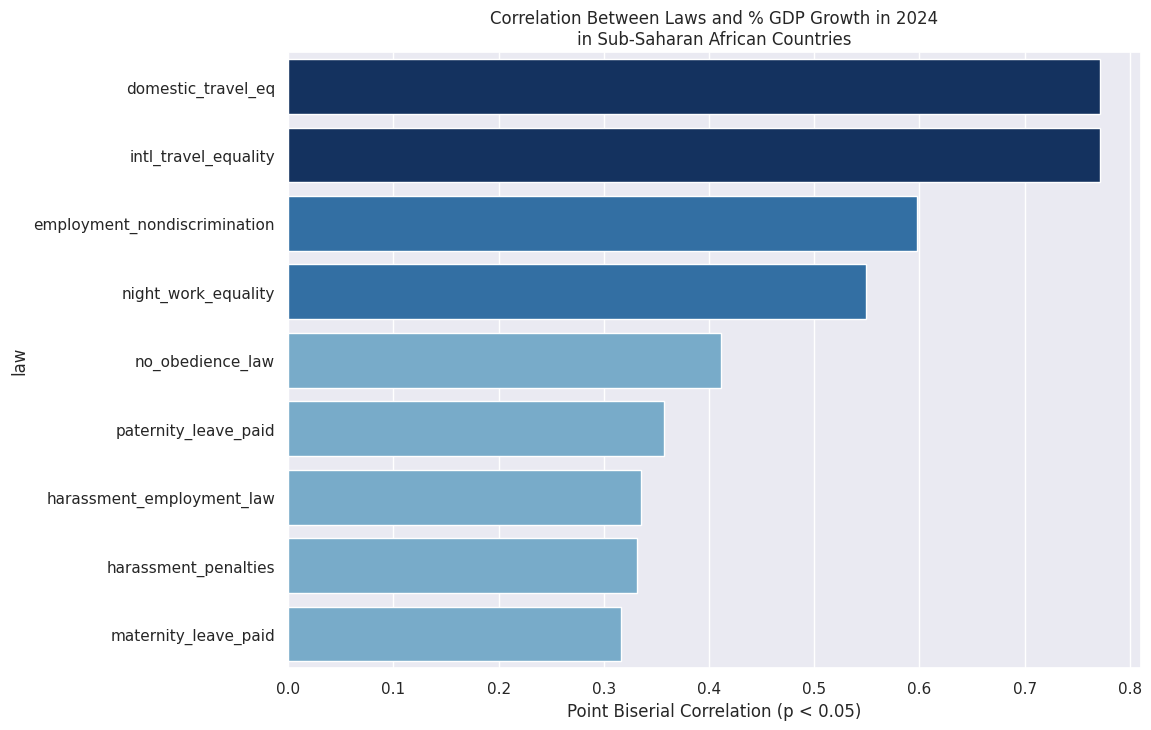

In [79]:
stat_sig_correlations_df["bar_color"] = (
    stat_sig_correlations_df["correlation"].apply(corr_to_color)
)

ax = sns.barplot(
    data=stat_sig_correlations_df,
    x="correlation",
    y="law",
    palette=stat_sig_correlations_df["bar_color"].tolist()
)

ax.set_xlabel("Point Biserial Correlation (p < 0.05)")
plt.title("Correlation Between Laws and % GDP Growth in 2024\nin Sub-Saharan African Countries")
plt.show()

In [ ]:
!pip install ipywidgets


In [96]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# ✅ Your selectable values
country_options = ssa_historical_legal_2024["Economy"].tolist()
law_options = question_columns

# ✅ Your variable (will be reassigned)
selected_country = country_options[0]
selected_law = law_options[0]

dropdown = widgets.Dropdown(
    options=country_options,
    value=selected_country,
    description="Select:",
    layout=widgets.Layout(width="300px")
)

dropdown_law = widgets.Dropdown(
    options=law_options,
    value=selected_law,
    description="Select:",
    layout=widgets.Layout(width="300px")
)

output = widgets.Output()

def on_change(change):
    global selected_country, selected_law
    selected_country = change["new"]   # ✅ Variable reassigned

    with output:
        clear_output()
        print(f"Country: {selected_country}")
        print(f"Law: {selected_law}")
        country_does_have_law = ssa_historical_legal_2024[ssa_historical_legal_2024["Economy"] == selected_country][selected_law].values[0]
        have_law_str = "does" if country_does_have_law == 1 else "does not"
        print(f"\n\nBenin **{have_law_str}** have this law.")

        df = ssa_historical_legal_2024[["Economy", law]].sort_values(law, ascending=False)

        has_law_countries = df[df[law] == 1]["Economy"].tolist()
        does_not_have_law_countries = df[df[law] == 0]["Economy"].tolist()

        print(f"\n\nCountries that have this law: {has_law_countries}")
        print(f"\n\nCountries that do not have this law: {does_not_have_law_countries})")

dropdown.observe(on_change, names="value")

display(dropdown)
display(dropdown_law, output)


Dropdown(description='Select:', layout=Layout(width='300px'), options=('Angola', 'Benin', 'Botswana', 'Burkina…

Dropdown(description='Select:', layout=Layout(width='300px'), options=('Can a woman choose where to live in th…

Output()